<h1 align='center'><b>Introduction</b></h1>

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y)

Attribute:
* ```ID``` - client ID
* ```age``` - client age
* ```job``` - job type
* ```marital``` - marital status
* ```education``` - academic level
* ```default``` -  has credit in default?
* ```balance``` - has money in account?
* ```housing``` - has housing loan?
* ```loan``` - has personal loan?
* ```contact``` - contact communication type
* ```month``` - last contact month of year
* ```day``` - last contact day of the week
* ```duration``` -  last contact duration, in seconds
* ```campaign``` - number of contacts performed during this campaign and for this client
* ```pdays``` - number of days that passed by after the client was last contacted from a previous campaign
* ```previous``` - number of days that passed by after the client was last contacted from a previous campaign
* ```poutcomes``` - outcome of the previous marketing campaign
* ```y``` -  has the client subscribed a term deposit?










<b>Fathurrahman Syarief</b> | Data Mining <br>Teknologi Sains Data UA20

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings(action='ignore')

class Colors:
    Gray = "#5d5d5d"
    LightGray = "#fafafa"
    Black = "#000000"
    White = "#FFFFFF"
    Teal = "#008080"
    Aquamarine = "#76c8c8"
    Blue = "#2596be"
    LightCyan = "#badbdb"
    WhiteSmoke = "#dedad2"
    Cream = "#e4bcad"
    PeachPuff = "#df979e"
    HotPink = "#d7658b"
    DeepPink = "#c80064"
    LightSeaGreen = "#20B2AA"
    DarkGray = "#464144"


<h2>Read dataset</h2>

In [3]:
# read dataset
def read_banking_data(filepath) -> str:
    data = pd.read_csv(filepath, delimiter=';')\
        .rename(columns={'y':'subscribed'})

    data = data[data['age'] != 'age']

    numeric = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
    for att in numeric:
        data[att] = pd.to_numeric(data[att])

    return data


df = read_banking_data(filepath='https://raw.githubusercontent.com/fathur-rs/Dataset/main/banking-dataset-marketing-targets.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 49732
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   contact     49732 non-null  object
 9   day         49732 non-null  int64 
 10  month       49732 non-null  object
 11  duration    49732 non-null  int64 
 12  campaign    49732 non-null  int64 
 13  pdays       49732 non-null  int64 
 14  previous    49732 non-null  int64 
 15  poutcome    49732 non-null  object
 16  subscribed  49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


<h2>Missing Value</h2>

<AxesSubplot:>

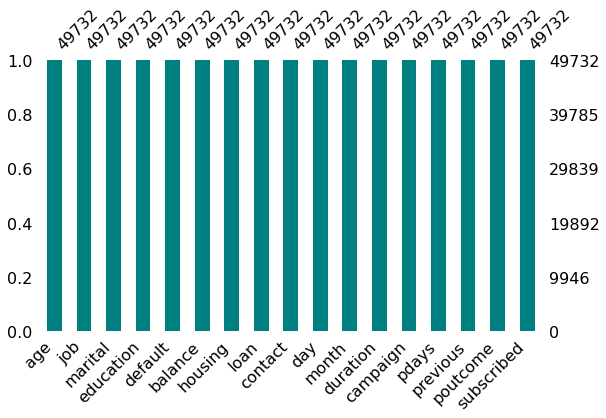

In [5]:
msno.bar(df, figsize=(9,5), color=Colors.Teal)

<h2>Handling Outlier</h2>

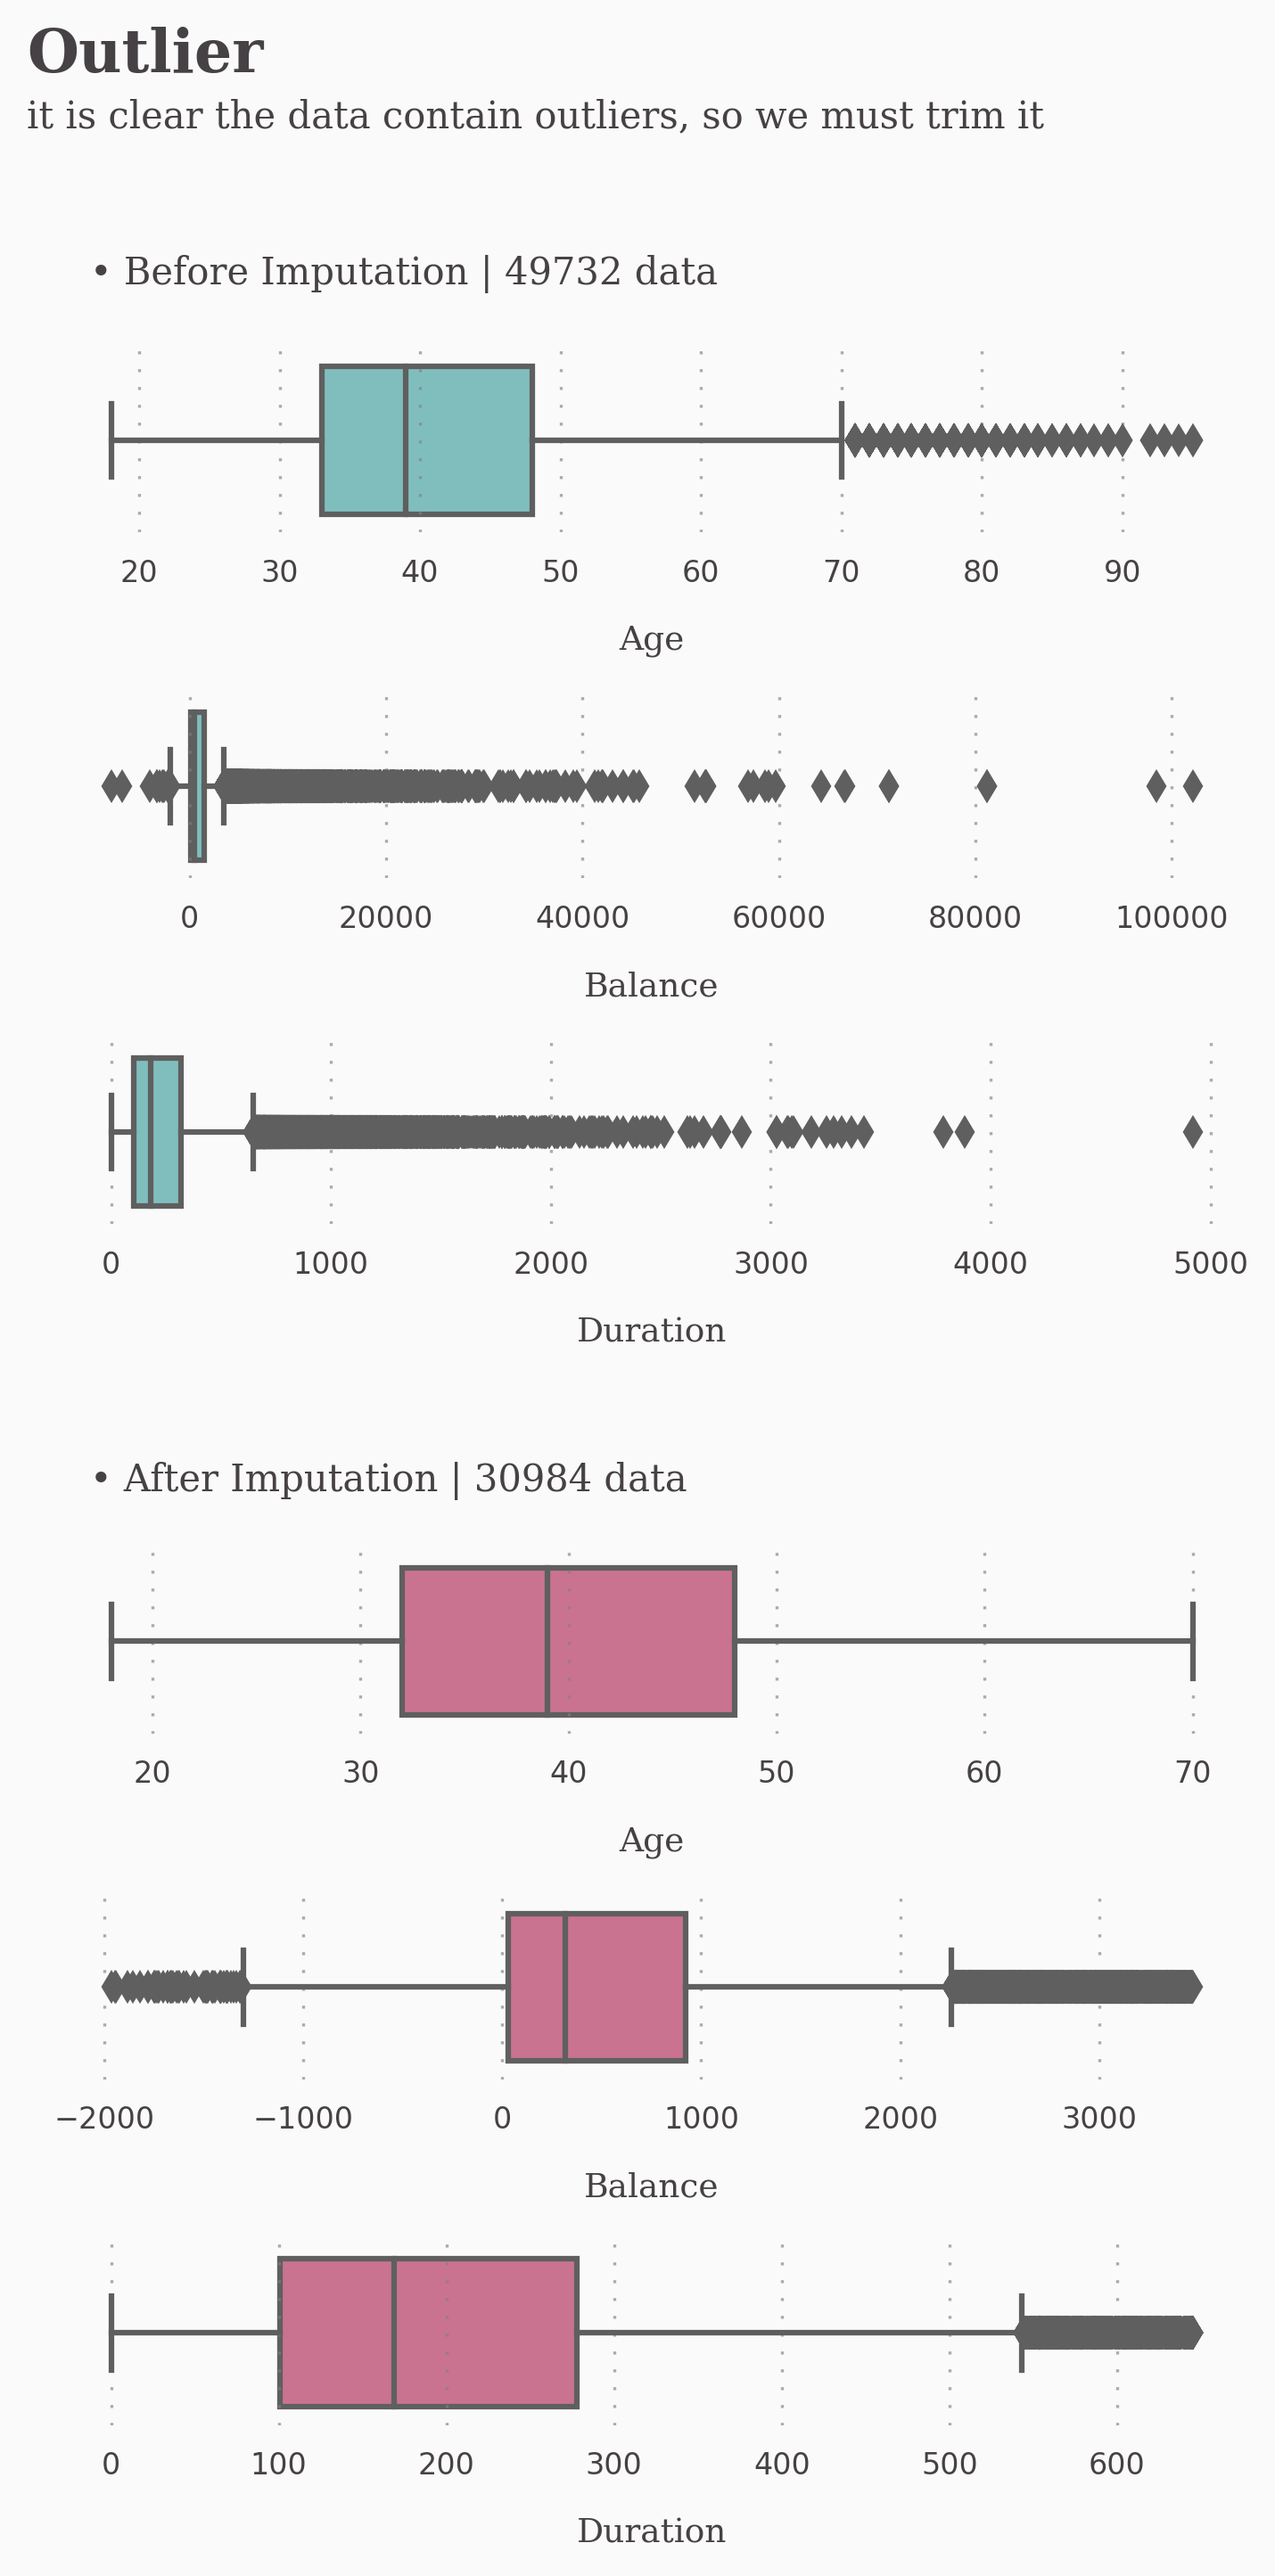

In [6]:
# setting up canvas
fig = plt.figure(figsize=(12, 12), dpi=300, facecolor=Colors.LightGray)
gs = fig.add_gridspec(8, 4, hspace=1, height_ratios=[1, 1, 1, 0.01, 1, 1, 1, 1])
# aalignment
for ax in range(0, 7):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[ax, 0:2])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="x",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].tick_params(
        axis="x", labelsize=8, bottom=False, labelcolor=Colors.DarkGray
    )
    locals()["axis" + str(ax)].xaxis.set_label_coords(0, -0.5)

    spines = ["top", "left", "right", "bottom"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)

# plot 1 - 3 -> before imputing
for ax, col in zip(range(0, 3), ["age", "balance", "duration"]):
    sns.boxplot(data=df, x=col, ax=locals()["axis" + str(ax)], color=Colors.Aquamarine)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=9, color=Colors.DarkGray
    )

# subset outliers function
def handling_outlier():
    cols = [
        "age",
        "balance",
        "duration",
        "day",
        "duration",
        "campaign",
        "pdays",
        "previous",
    ]
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df[
        ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    ]
    return df2


df2 = handling_outlier()

# plot 4 - 6 -> after imputing
for ax, col in zip(range(4, 7), ["age", "balance", "duration"]):
    sns.boxplot(data=df2, x=col, ax=locals()["axis" + str(ax)], color=Colors.HotPink)
    locals()["axis" + str(ax)].set_xlabel(
        col.title(), fontfamily="serif", fontsize=9, color=Colors.DarkGray
    )


# Text
axis0.text(
    12,
    -2,
    "Outlier",
    fontweight="bold",
    fontfamily="serif",
    fontsize=16,
    color=Colors.DarkGray,
)
axis0.text(
    12,
    -1.70,
    "it is clear the data contain outliers, so we must trim it",
    fontweight="normal",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
axis0.text(
    16.5,
    -0.85,
    f"• Before Imputation | {len(df)} data",
    fontweight="normal",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)

# axis3 is use to make a gap beetween after imputing vs before imputing plots
axis3.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0,
)
axis3.get_yaxis().set_visible(False)
axis3.get_xaxis().set_visible(False)
axis0.text(
    16.5,
    5.7,
    f"• After Imputation | {len(df2)} data",
    fontweight="normal",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)

fig.show()


Boxplot diatas merupakan visualisasi penyebaran data yang direpresentasikan oleh variabel Age, Balance, Duration. 

Dari hasil visualisasi didapati data-datanya memiliki outlier. Untuk itu lakukan imputasi outlier menggunakan teknik Upper Bound dan Lowe Bound atau IQR. Dari hasil imputasi dapat dilihat mayoritas outlier sudah terhapus

<h2>Data Visualisasi</h2>

* <h3>Job Type</h3>

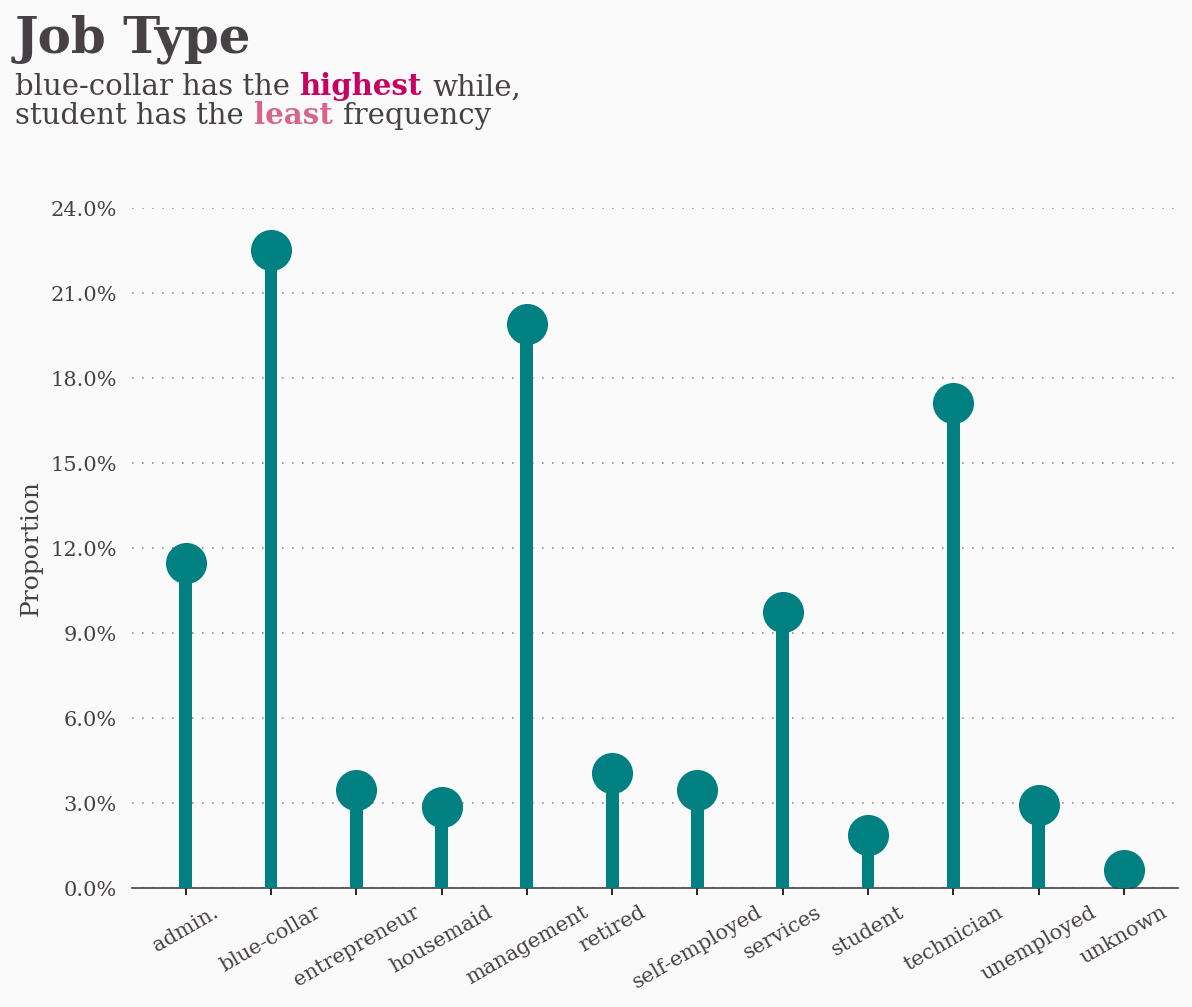

In [96]:
# data

job = pd.DataFrame(df2["job"].value_counts())
job["percentage"] = job["job"].apply(lambda x: x / sum(job["job"]) * 100)
job = job.sort_index()


# plot
fig = plt.figure(figsize=(9, 6), dpi=150, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis="y", left=False, color=Colors.DarkGray)

for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)

ax0.spines["bottom"].set_color(Colors.DarkGray)

ax0.bar(job.index, height=job.percentage, zorder=3, color=Colors.Teal, width=0.15)
ax0.scatter(job.index, job.percentage, s=350, color=Colors.Teal)


ax0.set_xticklabels(
    labels=list(job.index),
    rotation=30,
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
ax0.set_yticklabels(
    ax0.get_yticks(), fontfamily="serif", fontsize=10, color=Colors.DarkGray
)
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(3))
ax0.set_ylabel("Proportion", fontfamily="serif", fontsize=12, color=Colors.DarkGray)


ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color=Colors.Gray,
    linestyle=":",
    dashes=(1, 5),
    alpha=0.65,
)

ax0.yaxis.set_ticks(np.arange(0, 27, 3))


# text
ax0.text(
    -2,
    29.5,
    "Job Type",
    fontsize=24,
    fontfamily="serif",
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    -2,
    28,
    "blue-collar has the",
    fontsize=14,
    fontfamily="serif",
    fontweight="normal",
    color=Colors.DarkGray,
)
ax0.text(
    1.33,
    28,
    "highest",
    fontsize=14,
    fontfamily="serif",
    fontweight="bold",
    color=Colors.DeepPink,
)
ax0.text(
    2.9,
    28,
    "while,",
    fontsize=14,
    fontfamily="serif",
    fontweight="normal",
    color=Colors.DarkGray,
)

ax0.text(
    -2,
    27,
    "student has the",
    fontsize=14,
    fontfamily="serif",
    fontweight="normal",
    color=Colors.DarkGray,
)
ax0.text(
    0.8,
    27,
    "least",
    fontsize=14,
    fontfamily="serif",
    fontweight="bold",
    color=Colors.HotPink,
)
ax0.text(
    1.85,
    27,
    "frequency",
    fontsize=14,
    fontfamily="serif",
    fontweight="normal",
    color=Colors.DarkGray,
)

fig.show()


Bank cenderung lebih banyak menguhubungi orang dengan profile pekerjaan professional seperti blue-collar, management dan technician. Alasan mengapa bukan "unknown" yang dipilih sebagai nilai frekuensi terkecil karena, variable "unknown" akan dihapus 

* <h3>Marital Status</h3>

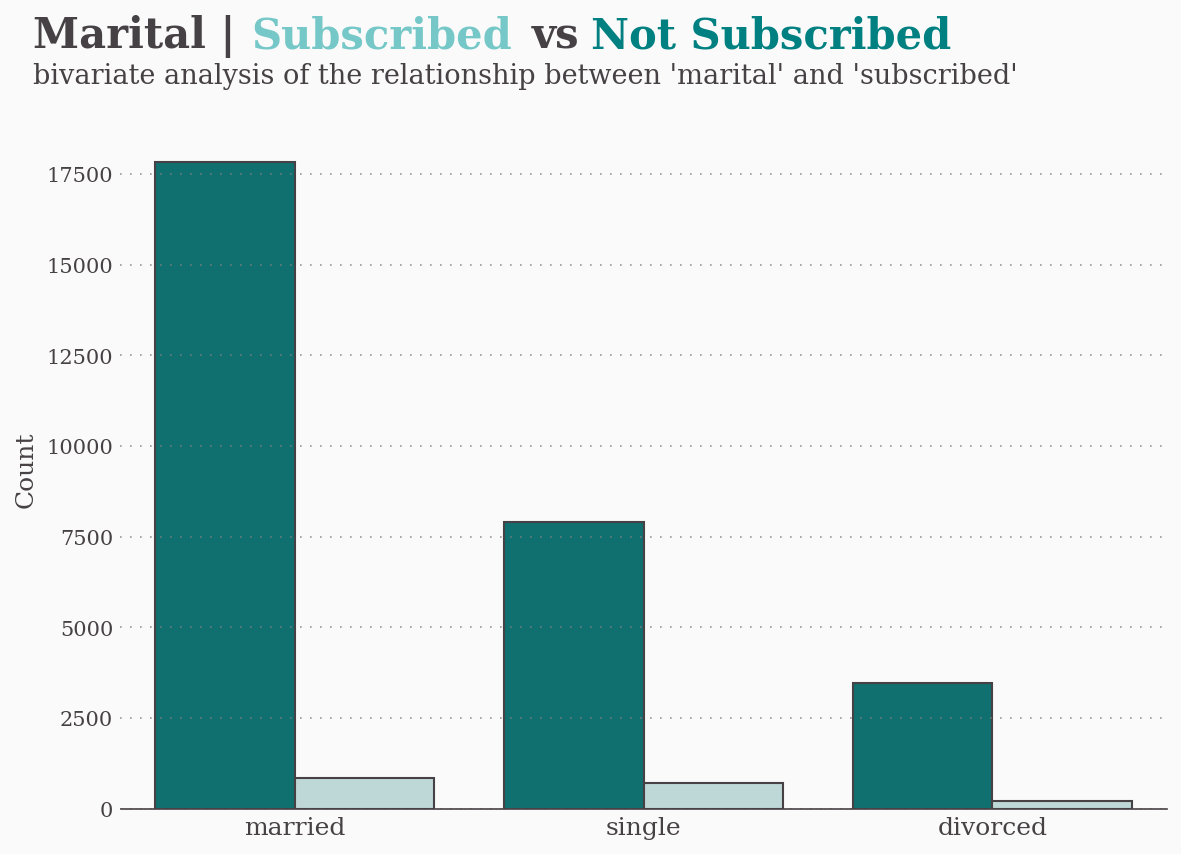

In [146]:
# plot
fig = plt.figure(figsize=(9, 6), dpi=150, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="y",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)


# plot
sns.countplot(
    data=df2,
    x="marital",
    hue="subscribed",
    palette=[Colors.Teal, Colors.LightCyan],
    ec=Colors.DarkGray,
    ax=ax0,
)
ax0.get_legend().remove()
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2500))

# plot setting
ax0.set_xticklabels(
    labels=list(df2["marital"].unique()),
    fontfamily="serif",
    fontsize=12,
    color=Colors.DarkGray,
)
plt.yticks(fontfamily="serif", color=Colors.DarkGray)
ax0.set_xlabel("")
ax0.set_ylabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(
    -0.75,
    21000,
    "Marital |",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    -0.125,
    21000,
    "Subscribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Aquamarine,
)
ax0.text(
    0.68,
    21000,
    "vs",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    0.85,
    21000,
    "Not Subscribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Teal,
)
ax0.text(
    -0.75,
    20000,
    "bivariate analysis of the relationship between 'marital' and 'subscribed'",
    fontfamily="serif",
    fontsize=13,
    fontweight="normal",
    color=Colors.DarkGray,
)

fig.show()


Bank lebih terarik pada orang yang sudah menikah dan lajang daripada yang bercerai. Acceptance rate terbesar terdapat pada client yang sudah menikah 

* <h3>Education</h3>

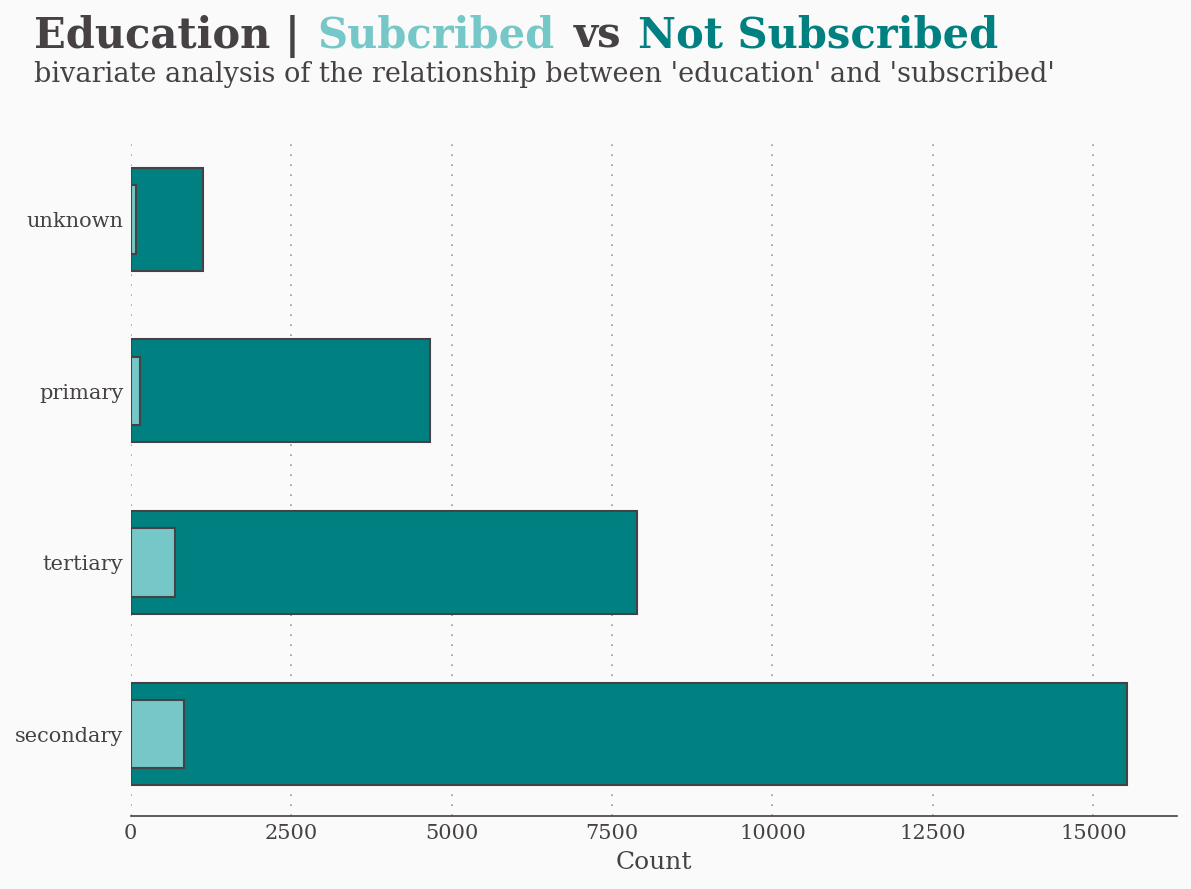

In [90]:
# data
no_subs = df2.query("subscribed == 'no'")
yes_subs = df2.query("subscribed == 'yes'")

positive = pd.DataFrame(yes_subs["education"].value_counts())
positive["Percentage"] = positive["education"].apply(
    lambda x: x / sum(positive["education"]) * 100
)

negative = pd.DataFrame(no_subs["education"].value_counts())
negative["Percentage"] = negative["education"].apply(
    lambda x: x / sum(negative["education"]) * 100
)


# plot
fig = plt.figure(figsize=(9, 6), dpi=150, facecolor=Colors.LightGray)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.35, hspace=0.27)

# allignment
ax0 = fig.add_subplot(gs[0:1, 0:1])
ax0.set_facecolor(Colors.LightGray)
ax0.grid(
    which="major",
    axis="x",
    zorder=0,
    color="gray",
    linestyle=":",
    dashes=(1, 5),
    alpha=0.8,
)
ax0.tick_params(axis="both", which="both", length=0)
ax0.set_xlabel("")
ax0.set_ylabel("")
for sp in ["top", "right", "left"]:
    ax0.spines[sp].set_visible(False)
ax0.spines["bottom"].set_color(Colors.DarkGray)


# plot
ax0.barh(
    positive.index,
    negative["education"],
    color=Colors.Teal,
    zorder=3,
    height=0.6,
    ec=Colors.DarkGray,
)
ax0.barh(
    negative.index,
    positive["education"],
    color=Colors.Aquamarine,
    zorder=3,
    ec=Colors.DarkGray,
    height=0.4,
)

# plot setting
ax0.xaxis.set_major_locator(mtick.MultipleLocator(2500))
plt.yticks(fontfamily="serif", color=Colors.DarkGray)
plt.xticks(fontfamily="serif", color=Colors.DarkGray)
ax0.set_xlabel("Count", fontfamily="serif", fontsize=12, color=Colors.DarkGray)

# text
ax0.text(
    -1500,
    4,
    "Education |",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    2900,
    4,
    "Subcribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Aquamarine,
)
ax0.text(
    6900,
    4,
    "vs",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
ax0.text(
    7900,
    4,
    "Not Subscribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Teal,
)
ax0.text(
    -1500,
    3.8,
    "bivariate analysis of the relationship between 'education' and 'subscribed'",
    fontfamily="serif",
    fontsize=13,
    fontweight="normal",
    color=Colors.DarkGray,
)

fig.show()


Lebih banyak orang dengan gelar pendidikan tinggi yang berlangganan. Jadi lebih banyak profil sekunder berarti lebih banyak deposito yang berhasil di langganankan.

* <h3>Binary Data<h3>

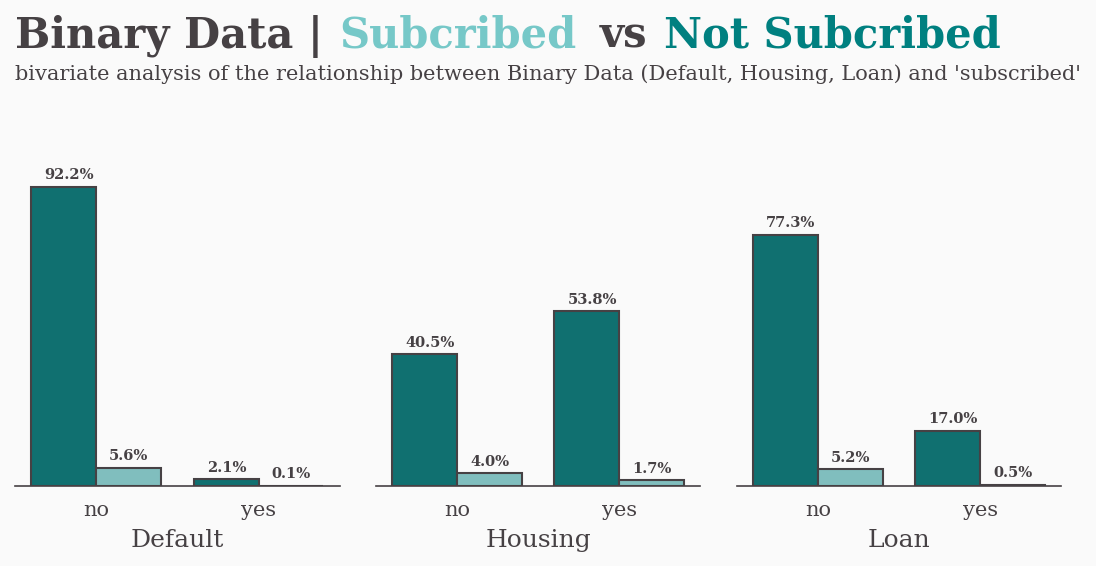

In [188]:
# data
# default
default = (
    df2.groupby(["default", "subscribed"]).size().to_frame(name="count").reset_index()
)
default["percentage"] = default["count"].apply(
    lambda x: x / sum(default["count"]) * 100
)

# housing
housing = (
    df2.groupby(["housing", "subscribed"]).size().to_frame(name="count").reset_index()
)
housing["percentage"] = housing["count"].apply(
    lambda x: x / sum(housing["count"]) * 100
)

# loan
loan = df2.groupby(["loan", "subscribed"]).size().to_frame(name="count").reset_index()
loan["percentage"] = loan["count"].apply(lambda x: x / sum(loan["count"]) * 100)

# setup canvas
fig = plt.figure(figsize=(9, 6), dpi=150, facecolor=Colors.LightGray)
gs = fig.add_gridspec(4, 6, wspace=0.25)

# aalignment
left = 0
right = 2
for ax in range(0, 3):
    locals()["axis" + str(ax)] = fig.add_subplot(gs[0:2, left:right])
    locals()["axis" + str(ax)].grid(
        which="major",
        axis="y",
        zorder=0,
        color="gray",
        linestyle=":",
        dashes=(1, 5),
        alpha=0.65,
    )
    locals()["axis" + str(ax)].set_facecolor(Colors.LightGray)
    locals()["axis" + str(ax)].tick_params(axis="x", bottom=False)
    locals()["axis" + str(ax)].tick_params(axis="y", left=False)
    locals()["axis" + str(ax)].get_yaxis().set_visible(False)
    spines = ["top", "left", "right"]
    for sp in spines:
        locals()["axis" + str(ax)].spines[sp].set_visible(False)
        locals()["axis" + str(ax)].spines["bottom"].set_color(Colors.DarkGray)

    left += 2
    right += 2

# plot
for ax, data in zip(range(3), [default, housing, loan]):
    sns.barplot(
        data=data,
        x=data.columns[0],
        y="percentage",
        hue="subscribed",
        ax=locals()["axis" + str(ax)],
        palette=clrs,
        ec=Colors.DarkGray,
    )
    locals()["axis" + str(ax)].yaxis.set_major_formatter(mtick.PercentFormatter())
    locals()["axis" + str(ax)].yaxis.set_major_locator(mtick.MultipleLocator(10))
    locals()["axis" + str(ax)].yaxis.set_ticks(np.arange(0, 110, 10))
    locals()["axis" + str(ax)].get_legend().remove()
    locals()["axis" + str(ax)].set_xticklabels(
        labels=["no", "yes"],
        fontfamily="serif",
        fontsize=10,
        color=Colors.DarkGray,
    )
    locals()["axis" + str(ax)].set_xlabel(
        data.columns[0].title(),
        fontfamily="serif",
        fontsize=12,
        color=Colors.DarkGray,
    )
    for p in locals()["axis" + str(ax)].patches:
        locals()["axis" + str(ax)].annotate(
            f"{round(p.get_height(), 1)}%",
            (p.get_x() + 0.08, p.get_height() + 2.5),
            fontsize=7,
            fontweight="bold",
            fontfamily="serif",
            color=Colors.DarkGray,
        )


axis0.text(
    -0.5,
    135,
    "Binary Data |",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)
axis0.text(
    -0.5,
    125,
    "bivariate analysis of the relationship between Binary Data (Default, Housing, Loan) and 'subscribed'",
    fontfamily="serif",
    fontsize=10,
    fontweight="normal",
    color=Colors.DarkGray,
)
axis0.text(
    1.5,
    135,
    "Subcribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Aquamarine,
)
axis0.text(
    3.5,
    135,
    "Not Subcribed",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.Teal,
)
axis0.text(
    3.1,
    135,
    "vs",
    fontfamily="serif",
    fontsize=20,
    fontweight="bold",
    color=Colors.DarkGray,
)

fig.show()


* <h3>Subscribed</h3>

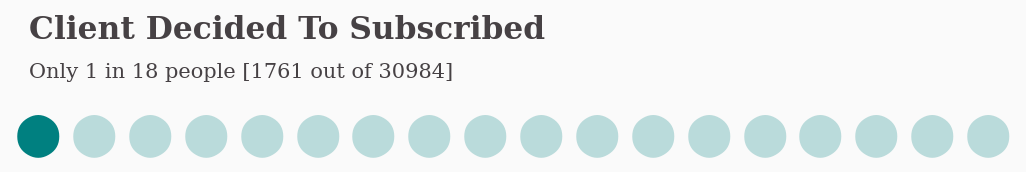

In [89]:
from pywaffle import Waffle

subs = pd.DataFrame(df2["subscribed"].value_counts())
subs["Percentage"] = subs["subscribed"].apply(
    lambda x: x / sum(subs["subscribed"]) * 100
)
subs = subs.sort_index()
# print(subs)

fig = plt.figure(
    figsize=(7, 2),
    dpi=150,
    facecolor=Colors.LightGray,
    FigureClass=Waffle,
    rows=1,
    values=[1, 17],
    colors=[Colors.Teal, Colors.LightCyan],
    characters="⬤",
    font_size=20,
    vertical=True,
)

fig.text(
    0.035,
    0.78,
    "Client Decided To Subscribed",
    fontfamily="serif",
    fontsize=15,
    fontweight="bold",
    color=Colors.DarkGray,
)
fig.text(
    0.035,
    0.65,
    f"Only 1 in 18 people [1761 out of {len(df2)}]",
    fontfamily="serif",
    fontsize=10,
    color=Colors.DarkGray,
)
fig.show()


Didapati penyebaran atribut variabel target tidak seimbang, hal ini dapat mengakibatkan performa model menjadi bias. Untuk itu perlu melakukan proses SMOTING atau oversampling